<a href="https://colab.research.google.com/github/strzelnat/machine_learning_study/blob/main/supervised/basics/_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import sklearn

In [8]:
data = {"price": [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
data_range = pd.date_range(start = "01-01-2020 09:00", end ="01-01-2020 18:00", periods = 10)

df = pd.DataFrame(data = data, index = data_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


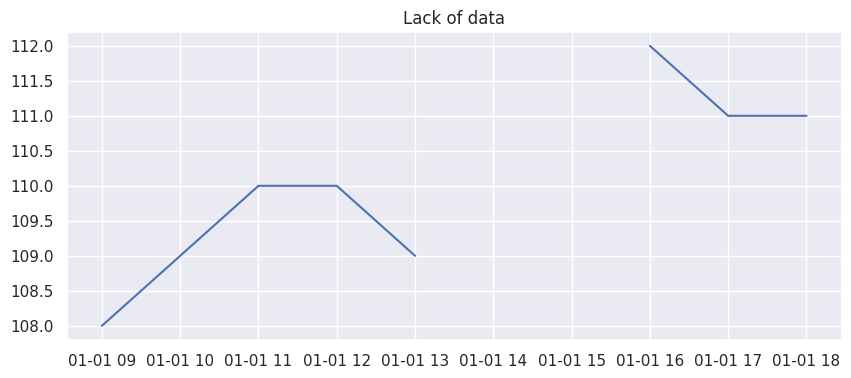

In [11]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize = (10, 4))
plt.title('Lack of data')
_ = plt.plot(df.price)

In [12]:
import plotly.express as px

In [16]:
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price',width = 600, height = 400, title = 'Time series - missing data')

Filling missing value with

In [26]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400,
        title = 'Time series - missing data - filling missing value with 0')

Removing missing data (in time series)

In [32]:
df_plotly = df.reset_index()
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Time series - missing data - removing missing data')

Filling missing value with the mean

In [27]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400,
        title = 'Time series - missing data - replaced by the mean')

Filling  missing values by method - forward fill

In [30]:
df_plotly = df.reset_index()
#old version
#df_plotly['price_fill'] = df_plotly['price'].fillna(method = 'ffill')
#new version

df_plotly['price_fill'] = df_plotly['price'].ffill()


px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400,
        title = 'Time series - missing data - using method forward fill')

Filling missing values by method - backward fill

In [31]:
df_plotly = df.reset_index()
#old version
#df_plotly['price_fill'] = df_plotly['price'].fillna(method = 'bfill')
#new version

df_plotly['price_fill'] = df_plotly['price'].bfill()


px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400,
        title = 'Time series - missing data - using method forward fill')

Filling missing values by interploation - _.interpolate() method

In [34]:
df_plotly = df.reset_index()
#old version
#df_plotly['price_fill'] = df_plotly['price'].fillna(method = 'bfill')
#new version

df_plotly['price_fill'] = df_plotly['price'].interpolate()


px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400,
        title = 'Time series - missing data - using linear interpolation')